**SVM Multiclass Classification.**

**SVM Multiclass Classification.**

SVM does not support multiclass classification natively. Two commonly used approaches that extend SVM for multiclass classification are One-vs-One and One-vs-Rest. In this exercise, we would like you to apply multiclass classification using SVM to classify number 0-10 from MNIST dataset. 
 
Specifically, we would like you to explore the following: 

1. **[5 scores]** You may randomly select 6000 samples for training and 1000 sample for testing. Ensure that you have chosen the samples evenly from each class. Then, show us the distribution of labels in the selected training and testing samples.

2. **[10 scores]** Let's assume that we choose the RBF kernel for SVM. You may separate your training set for tuning and validation. Please show the following results:   
*   a. Show the accuracy (or loss ) curves across of the validation set across different kernels and model parameters. 
*   b. Pick the best set of parameters and verify the final performance on the testing dataset.  

3. **[25 scores]** To see the differences between One-vs-one and One-vs-the rest. Let’s observe the positive and negative supports.  
*   a. For one-vs-one classification, what is the number of binary classifiers and how is it related to the number of classes? 
    - Observe the positive and negative supports of the first separation, the last separation, and any where in the middle.
*   b. For one-vs-rest classification, same question for the binary classifiers and number of classes. 
    - Also, observe the positive and negative supports of the first separation,  the last separation, and any where inbetween.
    
*   c. Can you tell the differences between the observation in (3.a) and (3.b)? 
    - For each observation, you may plot the mean shapes of the positive and negative supports & the histogram of the labels associated with the positive and negative supports.



---

Note.

To get the full score, you should be able to provide the following plots with resonable results and **with good explaination**:

1. SVM_1_MNIST_label_distribution.png  **[5 scores]**  
2. SVM_2_ModelSelection.png **[5 scores]** +  your answers **[5 scores]**
3. Two sets for one_vs_one plots **[10 scores]**  and one_vs_rest_0/8/x plots **[10 scores]** and your answers **[5 scores]**. The examples of the plot files are as follows: 

  - SVM_3_mean_positive_support_one_vs_one_0.png
  - SVM_3_mean_positive_support_one_vs_one_8.png
  - SVM_3_mean_positive_support_one_vs_one_x.png
  - SVM_3_mean_negative_support_one_vs_one_0.png
  - SVM_3_mean_negative_support_one_vs_one_8.png
  - SVM_3_mean_negative_support_one_vs_one_x.png

  - SVM_3_MNIST_neg_pos_distribution_one_vs_one_0.png
  - SVM_3_MNIST_neg_pos_distribution_one_vs_one_8.png
  - SVM_3_MNIST_neg_pos_distribution_one_vs_one_x.png

  - SVM_3_positive_support_one_vs_one_0.png
  - SVM_3_positive_support_one_vs_one_8.png
  - SVM_3_positive_support_one_vs_one_x.png

  - SVM_3_negative_support_one_vs_one_0.png
  - SVM_3_negative_support_one_vs_one_8.png
  - SVM_3_negative_support_one_vs_one_x.png




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


11490434/11490434 [==============================] - 0s 0us/step


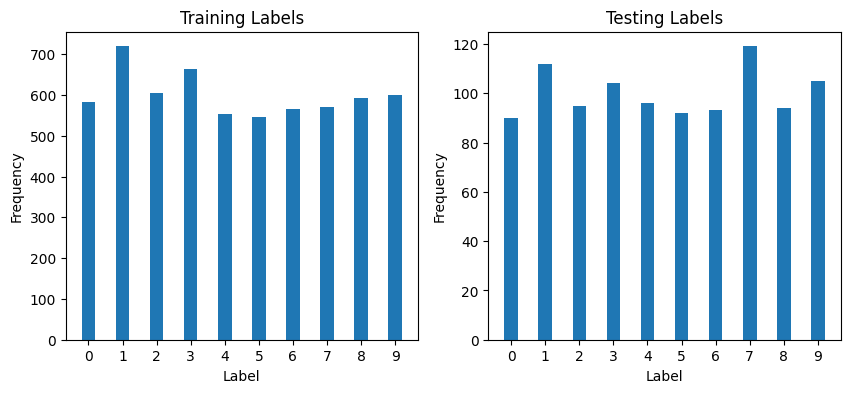

In [3]:
from scipy.stats import mode
import numpy as np
#from mnist import MNIST
from time import time
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib 
 
from itertools import chain
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
 
from sklearn.model_selection import ParameterGrid
from sklearn.svm import SVC, LinearSVC
from sklearn.multiclass import OneVsRestClassifier
import pandas as pd
import tensorflow as tf

########################################################### 
####################   Q.1 [5 scores]  ####################
########################################################### 

# Load the MNIST dataset

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Sample the data and reshape it into a 2D array
seq = np.random.randint(0,60000,6000)  # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< 
train_samp  = train_images[seq,:,:].reshape(-1,28*28) 
trlab_samp  = train_labels[seq] 

seq = np.random.randint(0,10000,1000) # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< 
test_samp   = test_images[seq, :,:].reshape(-1,28*28)
tslab_samp  = test_labels[seq] 
 


# 1. Show the distribution of the training and testing labels. 
# [Hint] You may use `np.histogram(trlab_samp, range=[0,10])`
# to get the histogram of the training labels.

train_hist, train_bins = np.histogram(trlab_samp, range=[0,10]) # <<<<<<<<<<<<<<<<<<< 
test_hist, test_bins   = np.histogram(tslab_samp, range=[0,10]) # <<<<<<<<<<<<<<<<<<<

ticks = range(10) 
width = 0.4
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4)) 
ax = axes[0]
ax.bar(ticks, train_hist, width, label='Training') # <<<<<<<<<<<<<<<<<<<
ax.set_xticks(ticks)
ax.set_ylabel('Frequency')
ax.set_xlabel('Label')
ax.set_title('Training Labels')
 
ax = axes[1] 
ax.bar(ticks, test_hist, width, label='Testing') # <<<<<<<<<<<<<<<<<<<
ax.set_xticks(ticks)
ax.set_ylabel('Frequency')
ax.set_xlabel('Label')
ax.set_title('Testing Labels')  
fig.savefig("SVM_1_MNIST_label_distribution.png")

{'C': 0.01, 'gamma': 1.0, 'Train': 5.445582606829473, 'Val': 5.428541203284823, 'ACC_tra': 0.12166666666666667, 'ACC_val': 0.1125, 'ACC_test': 0.112}
{'C': 0.1, 'gamma': 1.0, 'Train': 5.415262039598951, 'Val': 5.396904142563934, 'ACC_tra': 0.12166666666666667, 'ACC_val': 0.1125, 'ACC_test': 0.112}
{'C': 0.5, 'gamma': 1.0, 'Train': 3.057684579997529, 'Val': 3.0501264940072317, 'ACC_tra': 0.20979166666666665, 'ACC_val': 0.205, 'ACC_test': 0.112}
{'C': 1.0, 'gamma': 1.0, 'Train': 0.0, 'Val': 0.0, 'ACC_tra': 1.0, 'ACC_val': 1.0, 'ACC_test': 0.112}
{'C': 2.0, 'gamma': 1.0, 'Train': 0.0, 'Val': 0.0, 'ACC_tra': 1.0, 'ACC_val': 1.0, 'ACC_test': 0.112}
{'C': 2.5, 'gamma': 1.0, 'Train': 0.0, 'Val': 0.0, 'ACC_tra': 1.0, 'ACC_val': 1.0, 'ACC_test': 0.112}


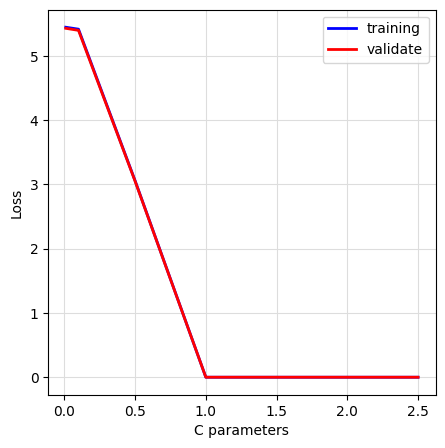

In [4]:
########################################################### 
####################   Q.2 [10 scores]  ####################
########################################################### 
 
# 2. Training and model selection

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import hinge_loss

c_list = [0.01, 0.1, 0.5, 1.0, 2.0, 2.5]  # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< 
g_list = [1.0] # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< 

# [Hint] You can also recheck your result with GridSearchCV. For example .... 
''' 
gamma_list = [0.01, 0.1, 1]
c_list     = [0.001, 0.1, 1, 10, 100]
param_grid = {'C': c_list, 'gamma':  gamma_list}

# Create a GridSearchCV object with the SVM model, hyperparameters, and custom scoring function
svc = SVC(kernel='rbf')
grid_search = GridSearchCV(svc, param_grid=param_grid, cv=5, return_train_score=True)

# Fit the GridSearchCV object to the training data
grid_search.fit(train_samp, trlab_samp)

# Get the best hyperparameters and associated training and validation losses
best_params = grid_search.best_params_ 
C = best_params['C']
gamma = best_params['gamma']
'''

sub_train_samp, val_samp, sub_trlab_samp, valab_samp = train_test_split(train_samp, trlab_samp, test_size=0.2)

tuning_ = [] 

for c in c_list:  
  for g in g_list:  
    svm = SVC(kernel='rbf', C=c, gamma=g)                      # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<  
    # perform grid search with 5-fold cross-validation
    # Fit the estimator to the data
    svm.fit(train_samp, trlab_samp)                            # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<  

    # Compute the decision function on the training data
    accuracy_train = svm.score(sub_train_samp, sub_trlab_samp) # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< 
    accuracy_val = svm.score(val_samp, valab_samp)             # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< 

    # Alternatively, compute the hinge loss on the training data
    decision_values = svm.decision_function(sub_train_samp)   # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< 
    h_loss = hinge_loss(sub_trlab_samp, decision_values)

    decision_values_test = svm.decision_function(val_samp)    # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< 
    v_loss               = hinge_loss(valab_samp, decision_values_test)  

    tuning_.append({"C":c, "gamma":g,  "Train": h_loss, "Val":v_loss, 'ACC_tra' : accuracy_train, 'ACC_val' : accuracy_val })
    print({"C":c, "gamma":g,  "Train": h_loss, "Val":v_loss, 'ACC_tra' : accuracy_train, 'ACC_val' : accuracy_val })

df_tuning = pd.DataFrame(tuning_)
 
training_acc   = df_tuning['Train']
validating_acc = df_tuning['Val']

fig = plt.figure(figsize=(5,5)) 
plt.plot(c_list, training_acc, label='training',color='blue', linewidth=2.0)  # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< 
plt.plot(c_list, validating_acc, label='validate',color='red', linewidth=2.0) # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< 
plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
plt.xlabel("C parameters") 
plt.legend()
plt.ylabel("Loss")
fig.savefig("SVM_2_ModelSelection.png")

# You can also try .... 

# gamma_list = [0.01, 0.1, 1]
# c_list     = [0.001, 0.1, 1, 10, 100]
# param_grid = {'C': c_list, 'gamma':  gamma_list}

# # Create a GridSearchCV object with the SVM model, hyperparameters, and custom scoring function
# svc = SVC(kernel='rbf')
# grid_search = GridSearchCV(svc, param_grid=param_grid, cv=5, return_train_score=True)

# # Fit the GridSearchCV object to the training data
# grid_search.fit(train_samp, trlab_samp)

# # Get the best hyperparameters and associated training and validation losses
# best_params = grid_search.best_params_

In [65]:
########################################################### 
####################   Q.3 [10 scores]  ####################
########################################################### 
# 3. To see the differences between One-vs-one and One-vs-the rest. Let’s observe the positive and negative supports.  
#     a. For one-vs-one classification, what is the number of binary classifiers and how is it related to the number of classes? 
#         - Observe the positive and negative supports of the first separation, the last separation, and any where in the middle.
#     b. For one-vs-rest classification, same question for the number of classifiers and classes. 
#         - Also, observe the positive and negative supports of the first separation,  the last separation, and any where inbetween.
#     c. Can you tell the differences between the observation in (3.a) and (3.b)? 
#     - For each observation, you may plot the mean shapes of the positive and negative supports & the histogram of 
#       the labels associated with the positive and negative supports.
 
best_c = 1 # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<  Please change the number to the best C you found in the previous step
best_gamma =  1 # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<  Please change the number to the best C you found in the previous step

type_svm =  "one_vs_one"  # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<  Please change the type of SVM you want to use. You can choose either "one_vs_one" or "one_vs_rest"

# Perform the training for SVM classification
if type_svm == "one_vs_one":
  # Train One vs One [SVM model with RBF kernel]
  svm = SVC(kernel='rbf', C=best_c, gamma=best_gamma) # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< 
  svm.fit(train_samp, trlab_samp)  

elif type_svm == "one_vs_rest":
  # Train One vs Rest [SVM model with RBF kernel]
  svm = SVC(kernel='rbf', C=best_c, gamma=best_gamma) # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< 
  ovr_svc = OneVsRestClassifier(svm)  # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< 
  ovr_svc.fit(train_samp, trlab_samp)  

In [66]:
# Visualize the supports (positive and negative supports)

if type_svm == "one_vs_one":
  dual_coef = svm.dual_coef_ 
  support   = svm.support_

  print("Number of  binary classifiers: %d" % dual_coef.shape[0]) 
  print("Number of  Support Coefficients: %d" % dual_coef.shape[1])
  
  class_i =  1 # 0, 8, 3  <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<    Try the first separation, the last separation, and any where inbetween ...Check with the number of  binary classifiers
  separate_i    = class_i
  pos_support = support[dual_coef[separate_i,:] > 0]
  neg_support = support[dual_coef[separate_i,:] < 0]

elif type_svm == "one_vs_rest": 
  
   
  class_i = 9  # 0, 9, 3 <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<  Try the first separation,  the last separation, and any where inbetween ...Check with the number of binary classifiers 

  # Get binary classifiers for each class
  binary_clf = ovr_svc.estimators_[class_i] 
  # get the dual coefficients for class_i
  dual_coef = binary_clf.dual_coef_
  support   = binary_clf.support_

  print("Number of  binary classifiers: %d" % len(ovr_svc.estimators_))
  print("Number of  Support Coefficients: %d" % dual_coef.shape[1])

  pos_support = support[dual_coef[0,:] > 0]
  neg_support = support[dual_coef[0,:] < 0]


print(f"Number of supports for positive class: {len(pos_support)}")
print(f"Number of supports for negative class: {len(neg_support)}")
 

Number of  binary classifiers: 9
Number of  Support Coefficients: 5973
Number of supports for positive class: 1261
Number of supports for negative class: 4697


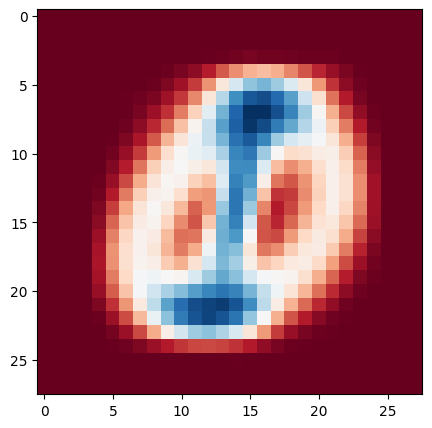

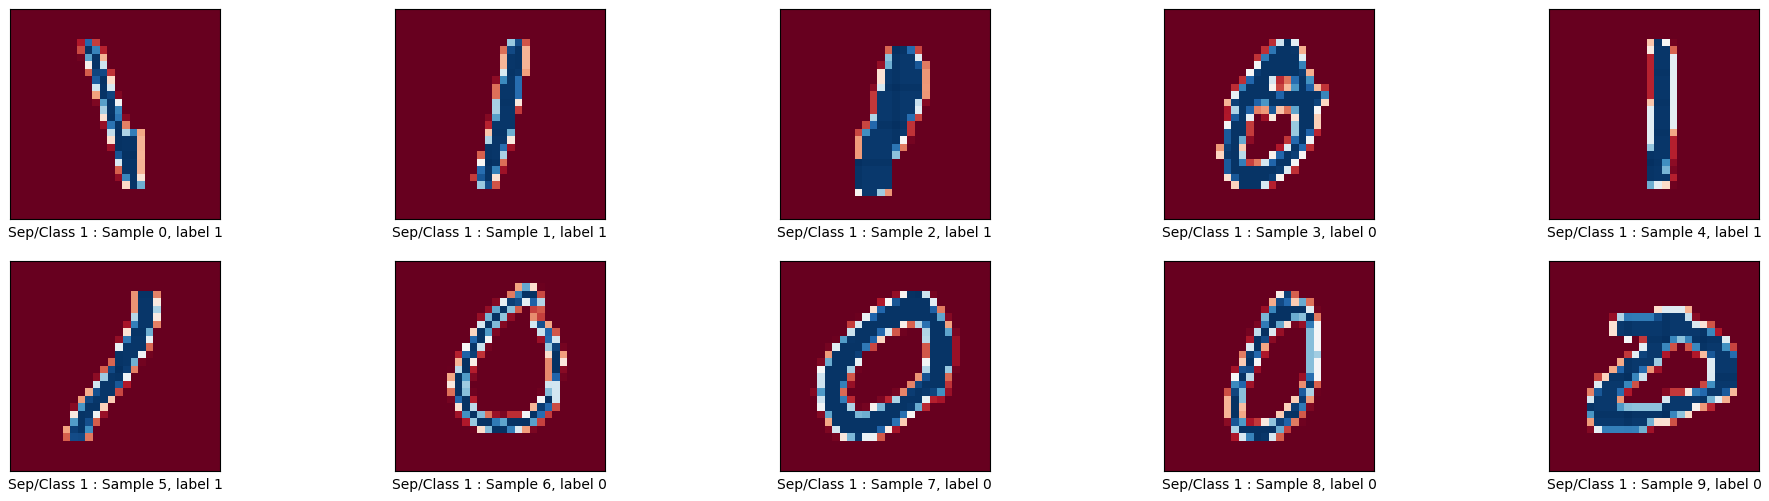

In [67]:
# Plot the mean shapes of the positive supports
# [Hint] Use `pos_support` to find the positive supports from the traing samples, i.e, train_samp, or from svm.support_vectors_
pos_supp_samples = train_samp[pos_support,:] # <<<<  Q.3.A,B,C
label_pos        = trlab_samp[pos_support]   # <<<<  Q.3.A,B,C

av_train = pos_supp_samples.mean(axis=0).reshape(-1, 28, 28) 
fig = plt.figure(figsize=(5,5))
plt.imshow(av_train.reshape(28, 28), cmap=plt.cm.RdBu)
fig.savefig("SVM_3_mean_positive_support_%s_%d.png" % (type_svm,class_i))

show_support = min(len(pos_support),len(neg_support))  
chosen_sample = np.random.randint(0, show_support,10)

ind = 0
fig = plt.figure(figsize=(24,6))
for i, sample_id in enumerate(chosen_sample):
  l1 = plt.subplot(int(len(chosen_sample)/5), 5, i + 1)  
  sv_image = pos_supp_samples[sample_id,:]
  sv_label = label_pos[sample_id]
  l1.imshow(sv_image.reshape(28, 28), cmap=plt.cm.RdBu)
  l1.set_xticks(())
  l1.set_yticks(())
  l1.set_xlabel('Sep/Class %d : Sample %d, label %s' % (class_i, i, str(sv_label))) 
fig.savefig("SVM_3_positive_support_%s_%d.png" % (type_svm,class_i))


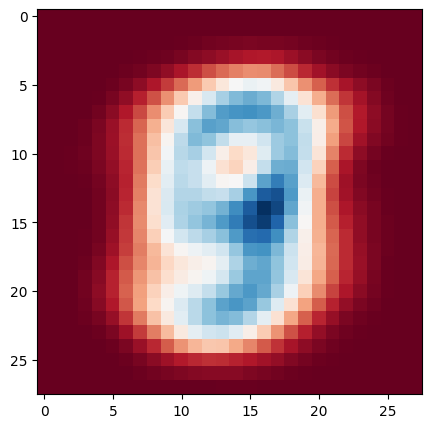

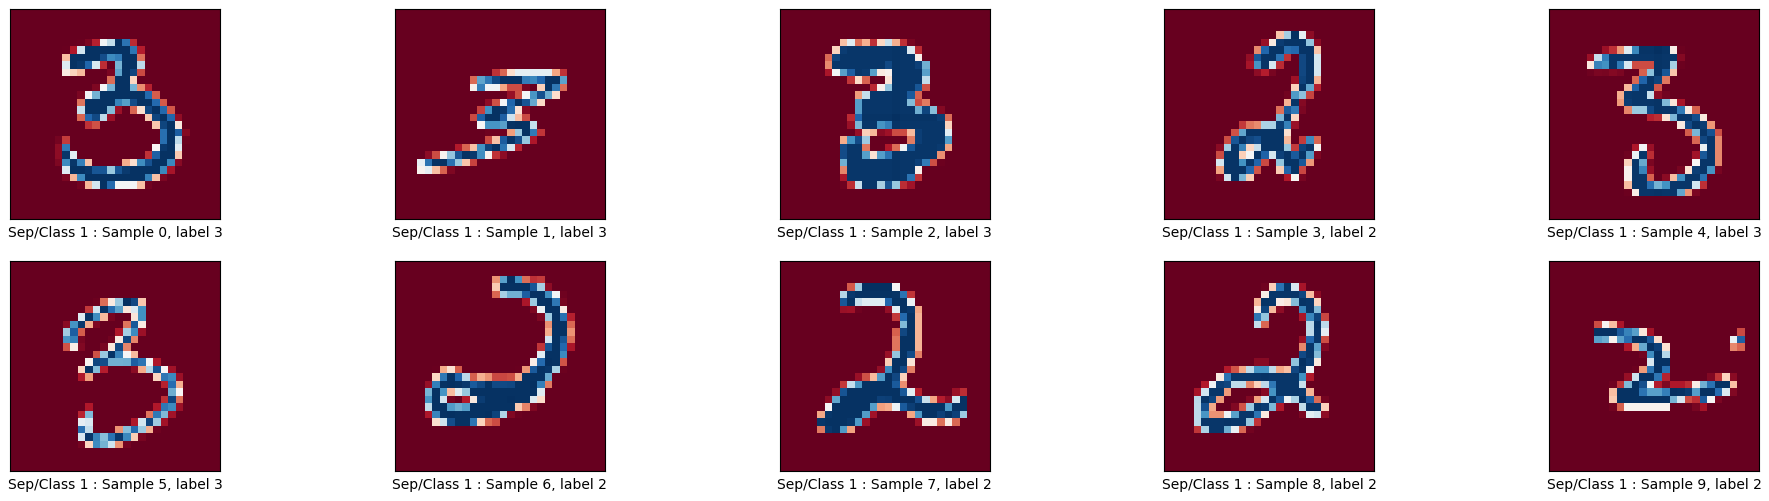

In [68]:
# Plot the mean shapes of the negative supports
# [Hint] Use `neg_support` to find the negative supports from the traing samples, i.e, train_samp, or from svm.support_vectors_
neg_supp_samples = train_samp[neg_support,:] # <<<<  Q.3.A,B,C
label_neg        = trlab_samp[neg_support]   # <<<<  Q.3.A,B,C

av_train = neg_supp_samples.mean(axis=0).reshape(-1, 28, 28) 
fig = plt.figure(figsize=(5,5))
plt.imshow(av_train.reshape(28, 28), cmap=plt.cm.RdBu)
fig.savefig("SVM_3_mean_negative_support_%s_%d.png" % (type_svm,class_i))
 
ind = 0
fig = plt.figure(figsize=(24,6))
for i, sample_id in enumerate(chosen_sample):
  l1 = plt.subplot(int(len(chosen_sample)/5), 5, i + 1)   
  sv_image = neg_supp_samples[sample_id,:]
  sv_label = label_neg[sample_id]
  l1.imshow(sv_image.reshape(28, 28), cmap=plt.cm.RdBu)
  l1.set_xticks(())
  l1.set_yticks(())
  l1.set_xlabel('Sep/Class %d : Sample %d, label %s' % (class_i, i, str(sv_label))) 

fig.savefig("SVM_3_negative_support_%s_%d.png" % (type_svm,class_i))

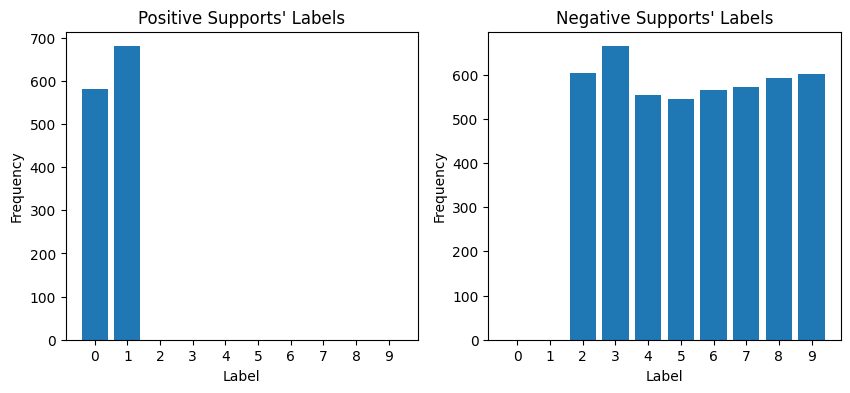

In [69]:
# Calculate the histogram of the labels associated with the positive and negative supports
pos_hist, pos_bins =  np.histogram(label_pos, range=[0,10]) #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
neg_hist, neg_bins =  np.histogram(label_neg, range=[0,10]) #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

width = 0.8
ticks = np.arange(10)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4)) 
ax = axes[0]
ax.bar(range(10), pos_hist, width )
ax.set_xticks(ticks)
ax.set_ylabel('Frequency')
ax.set_xlabel('Label')
ax.set_title("Positive Supports' Labels")
 
ax = axes[1] 
ax.bar(range(10), neg_hist, width )
ax.set_xticks(ticks)
ax.set_ylabel('Frequency')
ax.set_xlabel('Label')
ax.set_title("Negative Supports' Labels")

plt.show()
fig.savefig("SVM_3_MNIST_neg_pos_distribution_%s_%d.png" % (type_svm,class_i))